In [211]:
import numpy as np
import scipy
from scipy.interpolate import BSpline
from scipy.interpolate import _bspl

import matplotlib.pyplot as plt
import plotter

ModuleNotFoundError: No module named 'plotter'

In [210]:
# import sys
# import os
# module_path = os.path.abspath(os.path.join('.'))
# if module_path not in sys.path:
#     sys.path.append(module_path)
# from ..code import plotter

In [192]:
# get knot vectors
def get_kvs(rmin, rmax, nbins, order):
    nknots = order+2
    kvs = np.empty((nbins, nknots))

    width = (rmax-rmin)/(nbins-order)
    for i in range(order):
        val = i+1
        kvs[i,:] = np.concatenate((np.full(nknots-val, rmin), np.linspace(rmin+width, rmin+width*val, val)))
        kvs[nbins-i-1] = np.concatenate((np.linspace(rmax-width*val, rmax-width, val), np.full(nknots-val, rmax)))
    for j in range(nbins-2*order):
        idx = j+order
        kvs[idx] = rmin+width*j + np.arange(0,nknots)*width                     
    return kvs

def get_bases(rmin, rmax, nbins, order, ncont=300):
    if nbins<order*2:
        # does it have to be 2*order + 1? seems fine for piecewise, but for higher orders?
        raise ValueError("nbins must be at least twice the order")
    kvs = get_kvs(rmin, rmax, nbins, order)
    rcont = np.linspace(rmin, rmax, ncont)
    bases = np.empty((nbins, ncont))
    for n in range(nbins):
        kv = kvs[n]
        b = BSpline.basis_element(kv)
        bases[n,:] = [b(r) if kv[0]<=r<=kv[-1] else 0 for r in rcont]
    return bases

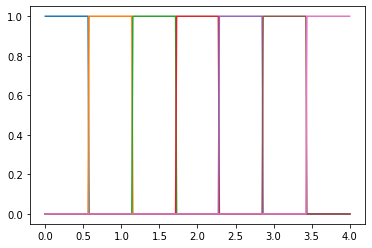

In [199]:
rmin = 0
rmax = 4
nbins = 7
order = 0
bases = get_bases(rmin, rmax, nbins, order)
for n in range(nbins):
    plt.plot(rcont, bases[n])

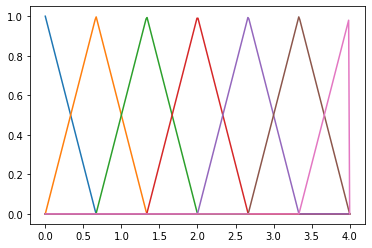

In [196]:
rmin = 0
rmax = 4
nbins = 7
order = 1
bases = get_bases(rmin, rmax, nbins, order)
for n in range(nbins):
    plt.plot(rcont, bases[n])

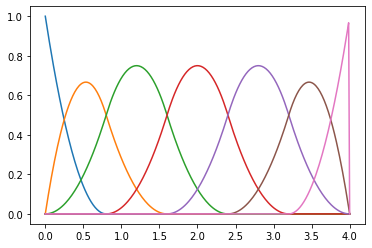

In [197]:
rmin = 0
rmax = 4
nbins = 7
order = 2
bases = get_bases(rmin, rmax, nbins, order)
for n in range(nbins):
    plt.plot(rcont, bases[n])

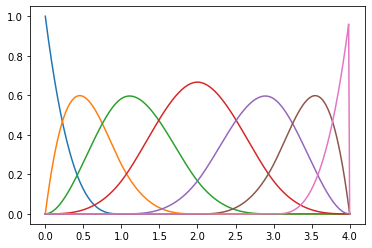

In [198]:
rmin = 0
rmax = 4
nbins = 7
order = 3
bases = get_bases(rmin, rmax, nbins, order)
for n in range(nbins):
    plt.plot(rcont, bases[n])